In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
#Load YOLO
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [4]:
# layer_names = net.getLayerNames()
outputlayers = net.getUnconnectedOutLayersNames()  


In [5]:
colors= np.random.uniform(0,255,size=(len(classes),3))

## Input Image:
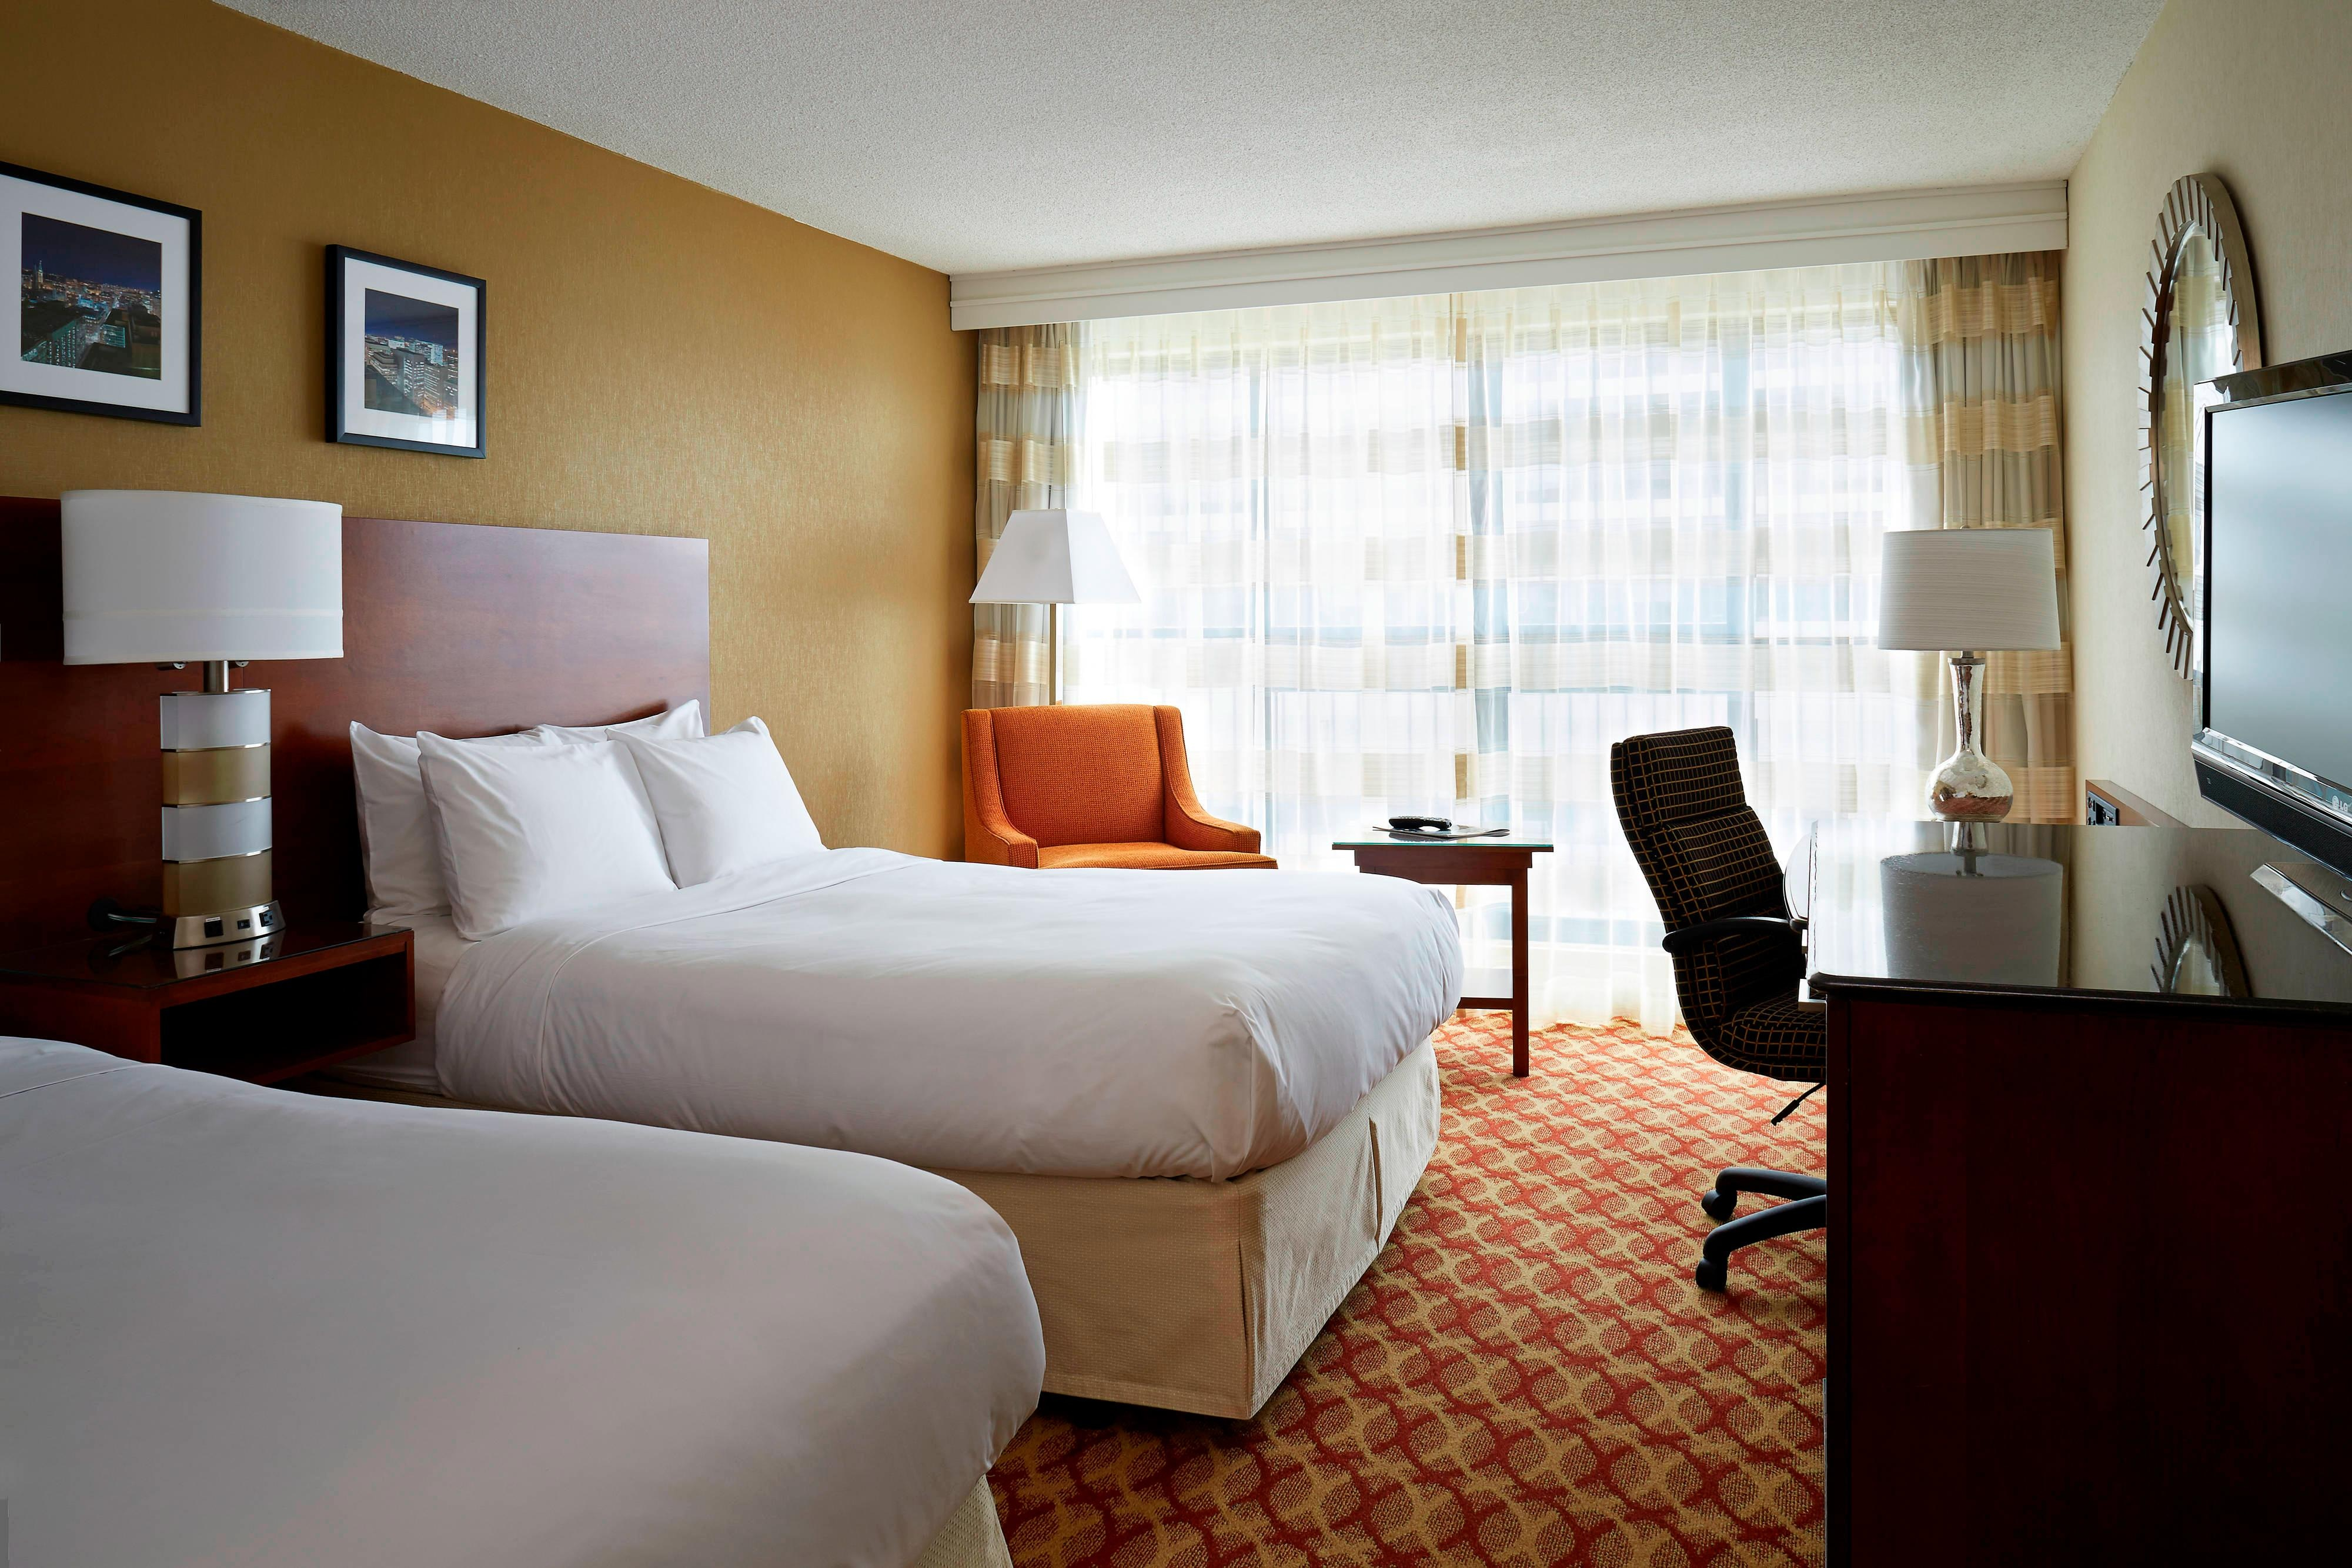

In [6]:
#loading image
img = cv2.imread("room.jpg")
img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape

In [7]:
#detecting objects
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

In [8]:
# for b in blob:
#     for n,img_blob in enumerate(b):
#         cv2.imshow(str(n),img_blob)
        
net.setInput(blob)
outs = net.forward(outputlayers)
#print(outs[1])


#Showing info on screen/ get confidence score of algorithm in detecting an object in blob
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
        
            #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)


font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y+30),font,3,(255,255,255),2)
            
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Output : 
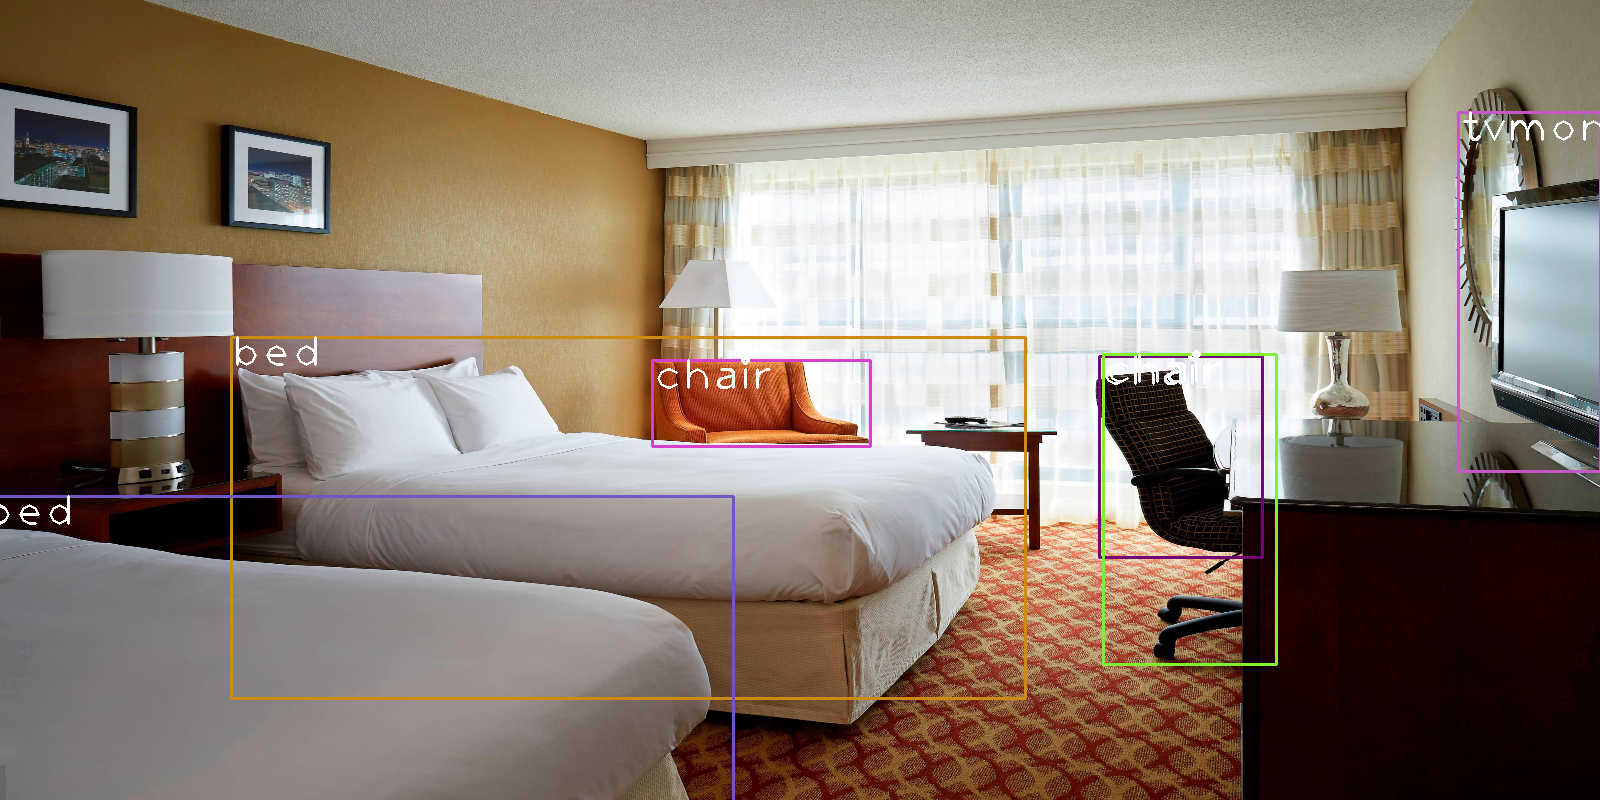            
        